<a href="https://colab.research.google.com/github/GeraldEspi/ADA-informes/blob/main/Informe_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de selección

En ciencias de la computación, un algoritmo de selección es un algoritmo que permite encontrar el k-ésimo menor número en una lista o vector, a este número se le llama estadístico de orden k. 

Dadas variables aleatorias  $[A1,A2,...,An]$ , reubicarlas en orden ascendente  $[B1,B2,...,Bn]$ . Donde el  Bi  elemento corresponde al estadístico de orden  k .

El problema puede resumirse en:

>**Entrada**: Conjunto de $n$ números diferentes $A$  más un índice $i$.

>**Salida**: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$.

>El elemento $x$ se conoce como **estadístico de orden $i$-ésimo** para el conjunto $A$.

 La cuestión de la selección es un problema esencial en la algorítmica, en particular en la búsqueda del máximo, el mínimo y la mediana . Se han propuesto varios algoritmos y se han estudiado varios contextos: Algoritmos online , complejidad amortizada , complejidad media , todo propósito especial, etc.

Ajeno a las  funcionalidades ya listadas, la selección de un dato concreto dentro de una lista tiene utilidades que facilitan la comunicación operador-interface, haciendo más amigable la búsqueda de información o estadísticos de orden.

## Código

### InsertionSort

In [ ]:
def InsertionSort(arr):
    cont_comp = 0
    #se recorre el arreglo
    for i in range(1, len(arr)):
        
        key = arr[i]
        j = i-1
        cont_comp += 1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
                arr[j + 1] = key
                if j == -1: cont_comp -= 1
                cont_comp += 1

    return cont_comp
  

### PivotSelection

In [ ]:
import numpy as np

def PivotSelection(arreglo, izq, der, verbose=False):
    arr = arreglo[izq:der+1]
    global contador;
    #Forma sub arreglos de 5 o menos elementos

    if verbose:
          print(colored("-----------\n","green"))
          print(colored("Pivote Select recibe el siguiente arreglo: ","grey"),colored(arr,"blue"))
          print(colored("Y forma subarreglos con 5 elementos o menos.","grey"))

    subArrays = [arr[i:i+5] for i in range(0, len(arr), 5)] # Se forman 
    
    # Ordena los subArreglos y guarda sus neduabas
    
    medianas = []
    if verbose:
          print(colored("\n-----------","green"))
          print(colored("## A continuación se hará muestra de los subArreglos","green"),colored("Desordenados", "red"),"\n")
    x = 1
    for i in subArrays:
        if verbose:
            print(colored(f"//----Arreglo {x}-- ","grey"), end=""); x+=1
            print(colored(f"{i}","blue"),"\n")
        contador += InsertionSort(i)
        medianas.append(i[len(i) // 2])
    x = 1
    if verbose:
          print(colored("-----------\n","green"))
          print(colored("##A continuación se hará muestra de los 5 subArreglos","green"),colored("Ordenados", "yellow"),colored("junto a su mediana \n","green"))
          for i in subArrays:
           if verbose:
            print(colored(f"//----Arreglo {x}","grey"),colored("ordenado","grey"),colored("--","grey"), end=" "); x+=1
            print(colored(f"{i}","blue"))
            print(colored("y su mediana corresponde a","grey"),colored({i[len(i) // 2]},"blue"),"\n")
    
        
    

    #medianas = [i[len(i) // 2]  for i in subArrays]

    # Consigue la mediana de las medianas
    if len(medianas) <= 5:
        contador += InsertionSort(medianas)
        pivote = medianas[len(medianas) // 2]
    else:
        if verbose:
            print(colored("-----------\n","green"))
            print(colored("Para el cálculo de la mediana de medianas\n","green")+
                  colored("Se envia el arreglo de medianas","green"),colored(f"{medianas}","blue"),colored("a Pivote Select","green"))
        pivote = PivotSelection(medianas,0,len(medianas)-1,verbose) 
    
    if verbose: 
          print(colored("\n-----------","green"))
          print(colored(f"En ","grey")+colored(f"{arr}","blue"),"\n"+
                colored(f"Las medianas son","grey"),colored(f"{medianas}","blue"),colored(f".\nLa mediana de medianas es","grey"),colored(pivote,"blue"))
          
    return pivote

### Partition

In [ ]:
import random

def Partition(arr, izq, der, pivote):
    global contador
 
    # Se localiza el indice del pivote
    for k in range(izq,der+1):
        if arr[k] == pivote:
          contador +=1 
          indexPivote = k; 
          break 
    # Se posiciona el pivote en la ultima posicion del subarreglo (para no tener que hacer comparaciones diferentes cada vez)
    arr[indexPivote], arr[der] = arr[der], arr[indexPivote]
    
    # Se realiza el Partition con el pivote en la ultima posicion del subarreglo arr[izq:der+1]
    i = izq
    for j in range(izq,der):
        if arr[j] <= arr[der]:
            arr[j], arr[i] = arr[i], arr[j]
            i+=1
    arr[i], arr[der] = arr[der], arr[i]
    return i

### Select

In [137]:
from termcolor import colored

def Select(arr, izq, der, search, verbose = False):
    if izq < der :
        pivote = PivotSelection(arr, izq, der, verbose)
        if verbose: 
            print(colored("-----------\n","green"))
            print(colored(f"## Se selecciono el pivote","green"),colored(pivote,"blue"))
            print(colored("\n-----------","green"))
        med = Partition(arr, izq, der, pivote)
        if verbose: 

            print(colored("Mitad izquierda","grey"),colored("/","red"),colored("Mitad derecha","grey"))
            print(colored(arr[izq:med],"blue"),end="")
            print(colored(" / ","red"),end="")
            print(colored(arr[med+1:der+1],"blue"))
          

        
        if(med == search):
          if verbose:
            print(colored("\n-----------","green"))
            print(colored("Se encontró el","green"),colored(search+1,"blue"), colored("elemento buscado","green")) 
            print(colored("Correspondiente a","green"),colored(arr[search],"blue"))
            print(colored("-----------\n","green"))
            return
        elif(med > search): 
            Select(arr, izq, med-1, search)
        else: 
            Select(arr, med + 1, der, search)

## Ejemplo de código **Select**

In [145]:
print(colored("ingresar numero","green"))
arr = [-11, -72, 26, 78, 56, 71, 23]
numero = int(input())
contador = 0
if(numero-1 < len(arr)):
  print(colored("Arreglo inicial:","green"))
  print(colored(arr,"blue"))
  Select(arr, 0, len(arr)-1, numero-1,verbose = False)
  print(colored("El","grey"),colored(numero,"blue"),colored("menor elemento dentro del arreglo corresponde a","grey"), colored(arr[numero-1],"blue"), colored("---Con un total de","green"),colored(contador, "blue"),colored("comparaciones---","green"))
  InsertionSort(arr)
  
else:
  print(colored("No es posible econtrar el número seleccionado ya que solo existen","red"), colored(len(arr),"blue"), colored("elementos en el arreglo","red"))

ingresar numero
3
Arreglo inicial:
[-11, -72, 26, 78, 56, 71, 23]
El 3 menor elemento dentro del arreglo corresponde a 23 ---Con un total de 15 comparaciones---


# 2. Descripción del algoritmo

# **Select**

El algoritmo select consiste en partir un arreglo en varias partes y que cada división cotenga 5 elemento y cada subArreglo obtenido ordenarlo mediante InsertionSort (A causa de que en este caso tiende a ser lineal). Luego se cosigue la mediana de cada subArreglo, creando un vector/arreglo que contenga las medianas. El pivote a utilizar en el arreglo original corresponde a la mediana del arreglo de medianas.

Para realizar esta tarea se utilizan funciones auxiliares que permiten desarrollar la tarea de manera más sencilla, entre ellas se encuentra PivotSelection.

PivotSelection sigue los siguientes pasos:

> 1.- Divide el conjunto en grupos de 5 elementos cada uno.

>2.- Encuentra la mediana de cada grupo aplicado el algoritmo InsertionSort para ordenarlos.

>3.- Aplica la función PivotSelection recursivamente para encontrar la mediana m de las medianas identificadas en el paso previo.

>4.- Utiliza la mediana m como pivote para la función Partition.

Por otro lado también hace uso de la función Partition, será la encargada de acomodar los elementos del pedazo de arreglo utilizando el elemento
de más a la izquierda como pivot. El procedimiento partition modifica el arreglo desde izquierda hasta derecha dejando al comienzo todos los
elementos que son menores o iguales al que se encontraba originalmente en la posición lft, y al final atodos los que son mayores o iguales.





# 2.1 Ejemplo (Escrito)


Se considera el siguiente arreglo:

>**Entrada**: $[1,4,3]$

>**Buscado**: $2$

* Select recibe el arreglo $C$ = $[1,4,3]$ a su vez que el 2-iésimo dato buscado dentro de este mismo. Si `izq < der` llama a **PivotSelection**

* Ya una vez en **PivotSelection** se comprueba que la entrada consiste en un arreglo inferior a los 5 elementos requeridos para subdividir el arrelgo, por ende, se mantiene en uno solo.

* Luego de hecho eso, **PivotSelection** se procede a ordenar el arreglo a través de InsertionSort obteniendo $C$ = $[1,3,4]$, a su vez obtiene la mediana mediante `medianas.append(i[len(i) // 2])` retornando 3.

* Ahora se procede a dividir el arreglo en 2 partes mediante Partition. Ya aquí, en el arreglo recibido por Partition el cual sería $[1,3,4]$ se procede a buscar el índice del pvivote recibido, en este caso 3.

* Una vez obtenido intercambia la posición de el pivote con el último elemento de la parte derecha. Quedando $[1,4,3]$. Se compara cada dato con el pivote.

* Una vez hechas las respectivas comparaciones, el pivote debe ubicarse a la derecha del último elemento que haya sido menor o igual al pivote ($elemento \leq pivote$). Quedando $[1,3,4]$

* Finalmente se puede evidenciar que el pivote, en este caso 3, se encuentra en al segunda posición del arreglo (con $posición = index+1$). Lo que quiere decir que su posición coincide con el iésimo buscado. Por ende se encontrado. Correspondiente a 3.

# 2.2 Ejemplo Código **Verbose = True**

In [148]:
print(colored("ingresar numero","green"))
arr = [1,4,3]
numero = int(input())
contador = 0
if(numero-1 < len(arr)):
  print(colored("Arreglo inicial:","green"))
  print(colored(arr,"blue"))
  Select(arr, 0, len(arr)-1, numero-1,verbose = True)
  print(colored("El","grey"),colored(numero,"blue"),colored("menor elemento dentro del arreglo corresponde a","grey"), colored(arr[numero-1],"blue"), colored("---Con un total de","green"),colored(contador, "blue"),colored("comparaciones---","green"))
  InsertionSort(arr)
  
else:
  print(colored("No es posible econtrar el número seleccionado ya que solo existen","red"), colored(len(arr),"blue"), colored("elementos en el arreglo","red"))

ingresar numero
2
Arreglo inicial:
[1, 4, 3]
-----------

Pivote Select recibe el siguiente arreglo:  [1, 4, 3]
Y forma subarreglos con 5 elementos o menos.

-----------
## A continuación se hará muestra de los subArreglos Desordenados 

//----Arreglo 1-- [1, 4, 3] 

-----------

##A continuación se hará muestra de los 5 subArreglos Ordenados junto a su mediana 

//----Arreglo 1 ordenado -- [1, 3, 4]
y su mediana corresponde a {3} 


-----------
En [1, 4, 3] 
Las medianas son [3] .
La mediana de medianas es 3
-----------

## Se selecciono el pivote 3

-----------
Mitad izquierda / Mitad derecha
[1] / [4]

-----------
Se encontró el 2 elemento buscado
Correspondiente a 3
-----------

El 2 menor elemento dentro del arreglo corresponde a 3 ---Con un total de 4 comparaciones---


# 3. **Tiempo de ejecución**

### **Teorema (Tiempo de ejecución).**

se establece para Selection:

> **Peor caso:** $O(n^2)$

> **Mejor caso:** $O(n)$

> **Caso promedio:** $O(n)$

### **Caso promedio**

Prueba del teorema.
Primero se estudiará la complejidad individual de los algoritmos que utiliza **Select** como funciones auxiliares.

### *PivoteSelect*

Este algoritmo divide el arreglo en subarreglos de 5 elementos, los ordena con **Insertion** **Sort** y obtiene sus medianas formando un arreglo de medianas, luego aplica recursivamente a sí mismo en el arreglo de medianas para obtener la mediana del arreglo de medianas. Busca un dato que no sea nunca ni el mayor ni el menor elemento del arreglo, es decir, un buen pivote.

Insertion Sort tiene $O(n)$ de complejidad en casos promedios.

Buscar la mediana tiene complejidad $O(1)$, por eso su complejidad es despreciable en la complejidad de **PivoteSelect**.

$T(n) = T(\frac{n}{5}) + O(n)$

Se usará el teorema maestro.

$a = 1$;
$b = 5 $;
$d = 1$

Entonces nos encontramos en la situación  $a < b^d \rightarrow 1 < 5^1$

Eso quiere decir que el algoritmo tiene complejidad $O(n^d) ⇒ O(n^1)= O(n)$

### *Insertion Sort*

Se establece para InsertionSort:

>**Mejor caso:** $O(n)$

>**Peor caso:** $O(n^2)$

>**Caso promedio:** $O(n^2)$

Busca individualmente el dato de cada posición al compararlos con sus siguientes elementos.

### *Partition*

Divide el arreglo en dos mitades con distintas cantidades de elementos guiándose por un pivote, este pivote se ubicará en la posición que le correspondería en el arreglo ordenado, a su izquierda estarán los menores a él y a su derecha los mayores a él.

Para esto siempre compara el pivote con los elementos del arreglo una vez, por eso tiene complejidad $O(n)$ en todos sus casos, pues lo que hace no cambia por factores externos.


### *Select*

Se establece entonces que:

> PivotSelection $⇒ O(n)$

>Partition $⇒ O(n)$

El algoritmo usa **Pivote Select** para escoger un buen pivote, luego usa ese pivote en **Partition**, y decide si el buscado es el pivote, es mayor o menor a pivote, si el pivote no es el buscado aplicara **Select** en la mitad donde debería estar el elemento buscado.

En el peor de los caso tendrá una mitad con $\frac{3n}{10}$  y otra con $\frac{7n}{10}$. Es decir, nunca habrá mitad con $elementos > \frac{7n}{10}$.

Se prueba entonces para estos 2 casos:

$\frac{7n}{10}$

$T(n) = T(\frac{7n}{10}) + O(n) + O(n) = T(\frac{7n}{10}) + 2O(n)$

Nosotros podemos aplicar la siguiente transformación $\frac{7n}{10} = \frac{\frac{n}{1}}{\frac{10}{7}} = \frac{n}{\frac{10}{7}}$

$\Rightarrow T(n) = T(\frac{n}{\frac{10}{7}}) + 2O(n)$

Ahora es posible aplicar el teorema maestro.

$a=1$; $b= \frac{10}{7}$; $d = 1$

Entonces se presenta la situación $a < b^d \rightarrow 1 < (\frac{10}{7})^{1}$

Eso quiere decir que el algoritmo tiene complejidad $O(n^d) ⇒ O(n^1)= O(n)$

$\frac{3n}{10}$

$T(n) = T(\frac{3n}{10}) + O(n) + O(n) = T(\frac{3n}{10}) + 2O(n)$

 Es posible aplicar la siguiente transformación $\frac{3n}{10} = \frac{\frac{n}{1}}{\frac{10}{3}} = \frac{n}{\frac{10}{3}}$

 $\Rightarrow T(n) = T(\frac{n}{\frac{10}{3}}) + 2O(n)$

 Ahora es posible aplicar el teorema maestro.

$a=1$; $b= \frac{10}{3}$; $d = 1$

Se presenta la situación $a < b^d \rightarrow 1 < (\frac{10}{3})^{1}$

Lo que quiere decir que la complejidad de este algoritmo corresponde a $O(n^d) ⇒ O(n^1)= O(n)$

**Entonces es posible calcular la complejidad de Select**

Se establece entonces:

>$\frac{3n}{10} \rightarrow O(n)$

>$\frac{7n}{10} \rightarrow O(n)$


La complejidad del algoritmo se encuentra entre las peores divisiones.

$\frac{3n}{10} \leq$ Complejidad Del Algoritmo $\leq \frac{7n}{10}$

$O(n) \leq$ Complejidad Del Algoritmo $\leq O(n)$

Entonces la complejidad del algoritmo Select en su caso promedio es de $O(n)$.









# 4. Correctitud

# **Select**

## **Teorema (Correctitud).**

Select es un algoritmo que encuentra el $i$-ésimo  elemento menor dentro de una secuencia de $n$ datos, siempre que $1 \leq i \leq n$

## **Prueba del Teorema**

Para probar la correctitud de **Select** usaremos **inducción** debido a la recursividad del algoritmo.

>En **inducción** para probar una declaración, para todos los números naturales $n$ típicamente se debe:

>   1.-Probar su correctitud para un **caso base**, por ejemplo $n = 1$

> Probar que si un caso cualquiera $m$, donde $m < n$, es correcto, entonces el caso $n$ también lo es.

También se asume la correctitud de las siguientes funciones:

* **Pivote Select**
* **Partition**

### **Caso Base**

El caso base será cuando la mediana de medianas coincide con el estadístico de orden solicitado.

Luego de obtener la mediana de medianas se aplica como pivote en **Partition** y luego acabara la función  **Select** porque pivote es el estadístico de orden buscado, ya que dejo el estadístico de orden en la posición que le correspondería de ordenar el algoritmo. Esto siempre ocurre cuando $n=1$ y también puede ocurrir con $n < 1$.


### **Caso cualquiera**

El caso base cualquiera será cuando la mediana de medianas encontrada no es el elemento estadístico de orden buscado.

Luego de obtener la mediana de medianas se aplica como pivote en **Partition**, haciendo que el arreglo quede con 2 mitades, a la izquierda los menores al pivote y a la derecha los mayores.

Ahora se comprueba si $pivote = estadísticoDeOrden$, como no es asi se comprobará si es mayor o menor, si es mayor debe estar a la derecha con los mayores al pivote, y de ser menor a de encontrarse a la mitad izquierda del pivote.

Una vez identificado la mitad donde debe estar el estadístico de orden, se  envía aquella mitad a **Select**, con **Select** correcto ya que eventualmente llegara al caso base porque siempre recibe el conjunto donde debe estar el estadístico de orden buscado y eventualmente llegara al caso base.


# 5. Experimentos

A continuación se realizarán experimentos los cuales incluyen investigar:

* Comparar el algoritmo Select, con Randomized-Select (selección del pivote aleatoria).

* Comparar el número de comparaciones realizadas experimentalmente con el mejor y peor caso teóricos.


# 5.1. Select vs Randomized Select (Tiempo de ejecución)

implementación Randomided Select

In [133]:
import random

def RandomizedSelect(arr, izq, der, search):
    if izq < der :
        pivote = random.randint(izq,der)
        med = Partition(arr, izq, der, arr[pivote])
        if(med == search): return
        elif(med > search): RandomizedSelect(arr, izq, med-1, search)
        else: RandomizedSelect(arr, med + 1, der, search)

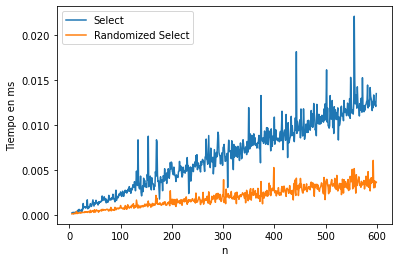

In [138]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
verbose = False
x=[]; y=[]; y1=[]

for n in range(5,600):
    a = random.sample(range(-100, 1000), n)
    Iesimo = random.randint(0,n)

    
    t = repeat(setup="from __main__ import Select", stmt=f"Select({a}, {0}, {len(a)-1}, {Iesimo-1},{False})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import RandomizedSelect", stmt=f"RandomizedSelect({a}, {0}, {len(a)-1}, {Iesimo-1})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Select", "Randomized Select"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# Análisis de Resultados

La princial diferencia entre Randomized Select y Select radica en la elección del pivote, mientras Select utiliza PivotSelection y según se implemente, incluso Partition, Randomized Select escoge el pivote de manera aleatoria. 

Lo anterior dicho puede dar cabida a una realentización en los procesos hechos por Select debido a la memoria necesaria y los respectivos procesos para acceder a ella, además de la mayor cantidad de pasos que se deben llevar a cabo y la propia naturaleza recursiva del algoritmo.


>![image](https://cdn.discordapp.com/attachments/838249461268217916/1023730370597884035/imagen_2022-09-25_195828445.png)

*Imágen hecha en canvas*



# 5.1. Peor caso vs Mejor caso vs Select (Comparaciones)

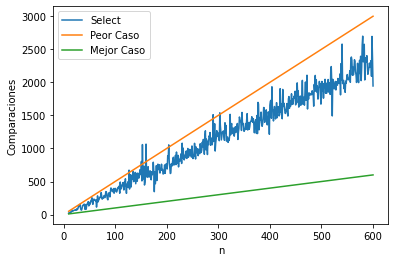

In [143]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]
y1=[5*n for n in range(10,601)] # peor caso
y2=[n for n in range(10,601)] # mejor caso
y=[]; 

for n in range(10,601):
    a = random.sample(range(-100, 1000), n)
    Iesimo = random.randint(0,n)
    contador = 0
    Select(a, 0, len(a)-1, Iesimo-1)
    x.append(n)
    y.append(contador)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Peor Caso", "Mejor Caso"])

plt.xlabel('n')
plt.ylabel('Comparaciones')
plt.show()

# Análisis de Resultados




Es visible que a pepsar que tanto el mejor como peor caso marcan unas cotas que delimitan la cantidad de comparaciones a un rango que podria considerarse el "promedio", salvo algunas excpeciones. Principalmente tiende a mantenerse en el marco que dibujan las 2 líneas rectas. Por lo que es correcto decir a su vez que se menatiene en la complejidad $O(n)$.

La cantidad de comparaciones suele, como era previsto, aumentar conforme la cantidad de elementos en el arreglo crece. Aún así, el gráfico presenta sitaciones en las que a pesar de que la cantidad de elementos sea mayor, las comparaciones no presentan un aumento (e incluco disminuyen) conforme a otras instancias en las que $n$ era menor. Tal como ocurre en el intervalo entre $[500,550]$. Esto se debe propiamente a la composición del arreglo de entrada.

